## ***General Plan*** ##

1 point for last, 2 for seconds to last, etc...
Sum up points at the end
Neighborhood w/ the most points wins this criteria

One potential problem with this methodology is that winning a subcategory by a little bit and by a lot are weighted the same, which may be a problem or it may end up valuing neighborhoods that are good in multiple different aspects of tree life rather than just really good in one facet

May have to deal with NaN winning (hopefully not)

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")

C:\Users\isaac\anaconda3\envs\cmpinf0010\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print(trees.shape)
treesByNeighborhood = trees.groupby('neighborhood')
print(treesByNeighborhood)

(45709, 58)


TreesByNeighborhood now holds the GroupBy object for the dataset when it has been grouped by the "neighborhood" category. This will make it easier to parse the data with that grouping in the future, since this object can be used instead of remaking it everytime.

In [4]:
print(type(trees))
neighborhood_trees = trees.count()
print(neighborhood_trees)
print(type(neighborhood_trees))
print(type(neighborhood_trees['neighborhood']))
print(neighborhood_trees['neighborhood'])

<class 'pandas.core.frame.DataFrame'>
id                                           45709
address_number                               38803
street                                       38867
common_name                                  45606
scientific_name                              45606
height                                       41335
width                                        41300
growth_space_length                          41515
growth_space_width                           41517
growth_space_type                            45516
diameter_base_height                         41380
stems                                        45707
overhead_utilities                           45527
land_use                                     45265
condition                                    39973
stormwater_benefits_dollar_value             40044
stormwater_benefits_runoff_elim              40044
property_value_benefits_dollarvalue          40044
property_value_benefits_leaf_surface_area   

In [5]:
print(trees['neighborhood'].nunique())

90


In [6]:
print(trees['neighborhood'].unique())
print(type(trees['neighborhood'].unique()))

['Homewood North' 'Oakwood' 'South Side Flats' 'East Allegheny'
 'Highland Park' 'Stanton Heights' 'Sheraden' 'Chartiers City' 'Elliott'
 'Morningside' 'Bloomfield' 'Friendship' 'Garfield' 'Polish Hill'
 'Lower Lawrenceville' 'Central Northside' 'East Liberty'
 'Central Lawrenceville' 'Shadyside' 'Allegheny Center' 'Homewood South'
 'Point Breeze North' 'East Hills' 'Homewood West' 'Greenfield'
 'Hazelwood' 'Squirrel Hill South' 'Marshall-Shadeland' 'Brighton Heights'
 'North Shore' 'Overbrook' 'Knoxville' 'Brookline' 'South Side Slopes'
 'Arlington' 'Arlington Heights' 'Carrick' 'Bedford Dwellings'
 'Central Business District' 'Bluff' 'West Oakland' 'South Oakland'
 'Squirrel Hill North' 'Point Breeze' 'Lincoln-Lemington-Belmar' 'Bon Air'
 'Mount Washington' 'California-Kirkbride' 'New Homestead'
 'Central Oakland' 'Crafton Heights' 'Beechview' 'Manchester' 'Allentown'
 'Beltzhoover' 'Allegheny West' 'Chateau' 'Duquesne Heights' 'Perry North'
 'Perry South' 'Middle Hill' 'Troy Hill' '

In [7]:
neighborhood_points = {}
np1 = {}
np2 = {}
np3 = {}
np4 = {}
np5 = {}
np6 = {}
np7 = {}
np8 = {}
for neighborhood in trees['neighborhood'].unique():
    neighborhood_points[neighborhood] = 0
    np1[neighborhood] = 0
    np2[neighborhood] = 0
    np3[neighborhood] = 0
    np4[neighborhood] = 0
    np5[neighborhood] = 0
    np6[neighborhood] = 0
    np7[neighborhood] = 0
    #np8[neighborhood] = 0
    
#print(neighborhood_points)

#del neighborhood_points['NaN']
      
points = pd.Series(neighborhood_points)

print(points)

Homewood North       0
Oakwood              0
South Side Flats     0
East Allegheny       0
Highland Park        0
                    ..
Mt. Oliver           0
Northview Heights    0
NaN                  0
Glen Hazel           0
Hays                 0
Length: 91, dtype: int64


This code sets up the dictionaries and series that will be used to keep track of the scores going forward. The points series will hold the running tally of the combined points while the dictionaries will hold the points for the individual categories. This will make it easier to graph and see how different categories affected the scoring, and who wins in the end.

Points holds the series

NaN appears since not every tree has a neighborhood attributed to it

At any point in the notebook you can just say points = pd.Series(neighborhood_points) to reset the points for easier test
(Eventually clean up the notebook when looking for final answer)

In [8]:
avgOverallBenefitsDollarValue = treesByNeighborhood['overall_benefits_dollar_value'].mean()
print(avgOverallBenefitsDollarValue)
print()
sortedAvgOverallBenefitsDollarValue = avgOverallBenefitsDollarValue.sort_values()
print(sortedAvgOverallBenefitsDollarValue)
print()
print(points)

neighborhood
Allegheny Center       171.791881
Allegheny West         149.084659
Allentown              120.451284
Arlington               71.204809
Arlington Heights      218.471558
                          ...    
Upper Lawrenceville    111.307346
West End                82.564056
West Oakland            76.122696
Westwood               126.776044
Windgap                135.477024
Name: overall_benefits_dollar_value, Length: 90, dtype: float64

neighborhood
Troy Hill                 43.015155
South Shore               45.616670
Polish Hill               65.607477
Central Lawrenceville     66.689438
Strip District            69.347687
                            ...    
St. Clair                170.079518
Allegheny Center         171.791881
Hays                     181.397515
Fairywood                207.420886
Arlington Heights        218.471558
Name: overall_benefits_dollar_value, Length: 90, dtype: float64

Homewood North       0
Oakwood              0
South Side Flats     0
East 

This code shows the basic format that will be used for getting winners of the individual categories. As stated eariler, TreesByNeighborhood holds the GroupBy object for the dataset with regards to the "neighborhood" column so all this code does is it grabs a specific property column that is currently being tested and then calculates the mean for that, and since it was Grouped By neighborhood that occurs for each neighborhood. Then those values are sorted using the sort_values() function and the result is stored into a new variable. This makes it relatively easy to then get the points for each neighborhood and update the relevant Series and dictionary.

In [9]:
print(sortedAvgOverallBenefitsDollarValue.index)
print(sortedAvgOverallBenefitsDollarValue.index[0])
print()
print(len(sortedAvgOverallBenefitsDollarValue))
#print(points)

Index(['Troy Hill', 'South Shore', 'Polish Hill', 'Central Lawrenceville',
       'Strip District', 'Arlington', 'Bedford Dwellings', 'West Oakland',
       'South Side Flats', 'Glen Hazel', 'Bluff', 'South Side Slopes',
       'West End', 'East Liberty', 'Friendship', 'South Oakland',
       'Terrace Village', 'Lower Lawrenceville', 'Central Northside',
       'Duquesne Heights', 'Spring Garden', 'Central Business District',
       'Crawford-Roberts', 'Middle Hill', 'East Allegheny', 'Mt. Oliver',
       'Bloomfield', 'Morningside', 'Larimer', 'Chateau',
       'Spring Hill-City View', 'Manchester', 'North Shore',
       'Mount Washington', 'Garfield', 'Bon Air', 'Esplen',
       'California-Kirkbride', 'Beltzhoover', 'Homewood West', 'Carrick',
       'Beechview', 'Greenfield', 'Upper Lawrenceville', 'North Oakland',
       'Ridgemont', 'Homewood South', 'Homewood North', 'Marshall-Shadeland',
       'Hazelwood', 'Overbrook', 'Allentown', 'Knoxville', 'Brighton Heights',
       'Sher

In [10]:
print(points)

for i in range(len(sortedAvgOverallBenefitsDollarValue)):
    neighborhood = sortedAvgOverallBenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np1[neighborhood] += (i+1)

points = points.sort_values()
print(points)
print(np1)
   


Homewood North       0
Oakwood              0
South Side Flats     0
East Allegheny       0
Highland Park        0
                    ..
Mt. Oliver           0
Northview Heights    0
NaN                  0
Glen Hazel           0
Hays                 0
Length: 91, dtype: int64
NaN                       0
Troy Hill                 1
South Shore               2
Polish Hill               3
Central Lawrenceville     4
                         ..
St. Clair                86
Allegheny Center         87
Hays                     88
Fairywood                89
Arlington Heights        90
Length: 91, dtype: int64
{'Homewood North': 48, 'Oakwood': 63, 'South Side Flats': 9, 'East Allegheny': 25, 'Highland Park': 79, 'Stanton Heights': 85, 'Sheraden': 55, 'Chartiers City': 64, 'Elliott': 65, 'Morningside': 28, 'Bloomfield': 27, 'Friendship': 15, 'Garfield': 35, 'Polish Hill': 3, 'Lower Lawrenceville': 18, 'Central Northside': 19, 'East Liberty': 14, 'Central Lawrenceville': 4, 'Shadyside': 58, 'Al

This code is the second part of the above structure. This utilizes the sorted data for the category, in this case "overall_benefits_dollar_value" to update the correct Series and dictionary. Then, after the loop has been run, the points are sorted again so that at any point it is easy to see what neighborhood is leading after a specific category.

According to this, the neighborhood that has the highest overall dollar value benefit from trees is Arlington Heights, followed by Fairywood and Hays, w/ Troy Hill coming in last.

Do the stuff above w/ the grabbing a column after it was grouped by neighborhood and then sorting and putting that in the points thing for the following columns: stormwater_benefits_dollar_value, property_value_benefits_dollarvalue, energy_benefits_electricity_dollar_value, energy_benefits_gas_dollar_value, air_quality_benfits_total_dollar_value, co2_benefits_dollar_value. Also, figure out a way to doing the conditions as well (maybe 10 points for good, 5, for poor, 0 for something else, idk rn figure it out later).

In [11]:
print(points)
print()

avgStormWaterBenefitsDollarValue = treesByNeighborhood['stormwater_benefits_dollar_value'].mean()
print(avgStormWaterBenefitsDollarValue)
sortedAvgStormWaterBenefitsDollarValue = avgStormWaterBenefitsDollarValue.sort_values()
print()
print(sortedAvgStormWaterBenefitsDollarValue)
print()

for i in range(len(sortedAvgStormWaterBenefitsDollarValue)):
    neighborhood = sortedAvgStormWaterBenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np2[neighborhood] += (i+1)

points = points.sort_values()
print(points)

NaN                       0
Troy Hill                 1
South Shore               2
Polish Hill               3
Central Lawrenceville     4
                         ..
St. Clair                86
Allegheny Center         87
Hays                     88
Fairywood                89
Arlington Heights        90
Length: 91, dtype: int64

neighborhood
Allegheny Center       17.628934
Allegheny West         14.579179
Allentown               8.778630
Arlington               4.747723
Arlington Heights      19.794012
                         ...    
Upper Lawrenceville     6.806012
West End                4.734003
West Oakland            3.317403
Westwood               12.380816
Windgap                11.913075
Name: stormwater_benefits_dollar_value, Length: 90, dtype: float64

neighborhood
Troy Hill                 1.595947
South Shore               2.219668
Strip District            2.929244
Glen Hazel                3.017582
Central Lawrenceville     3.179640
                           ...    

In [12]:
avgPropertyValueBenefitsDollarValue = treesByNeighborhood['property_value_benefits_dollarvalue'].mean()

sortedAvgPropertyValueBenefitsDollarValue = avgPropertyValueBenefitsDollarValue.sort_values()


for i in range(len(sortedAvgPropertyValueBenefitsDollarValue)):
    neighborhood = sortedAvgPropertyValueBenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np3[neighborhood] += (i+1)

points = points.sort_values()
print(points)

NaN                        0
Troy Hill                  4
South Shore                5
Central Lawrenceville     17
Glen Hazel                17
                        ... 
Squirrel Hill North      251
Stanton Heights          255
Allegheny Center         257
Fairywood                265
Arlington Heights        268
Length: 91, dtype: int64


In [13]:
avgEnergyBenefitsElectricityDollarValue = treesByNeighborhood['energy_benefits_electricity_dollar_value'].mean()

sortedAvgEnergyBenefitsElectricityDollarValue = avgEnergyBenefitsElectricityDollarValue.sort_values()


for i in range(len(sortedAvgEnergyBenefitsElectricityDollarValue)):
    neighborhood = sortedAvgEnergyBenefitsElectricityDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np4[neighborhood] += (i+1)

points = points.sort_values()
print(points)

NaN                        0
Troy Hill                  5
South Shore                7
Central Lawrenceville     21
Strip District            21
                        ... 
Squirrel Hill North      338
Stanton Heights          340
Allegheny Center         343
Fairywood                354
Arlington Heights        358
Length: 91, dtype: int64


In [14]:
avgEnergyBenefitsGasDollarValue = treesByNeighborhood['energy_benefits_gas_dollar_value'].mean()

sortedAvgEnergyBenefitsGasDollarValue = avgEnergyBenefitsGasDollarValue.sort_values()


for i in range(len(sortedAvgEnergyBenefitsGasDollarValue)):
    neighborhood = sortedAvgEnergyBenefitsGasDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np5[neighborhood] += (i+1)

points = points.sort_values()
print(points)

NaN                        0
Troy Hill                  6
South Shore                9
Strip District            24
Central Lawrenceville     26
                        ... 
Squirrel Hill North      425
Stanton Heights          425
Allegheny Center         429
Fairywood                443
Arlington Heights        448
Length: 91, dtype: int64


In [15]:
avgAirQualityBenefitsTotalDollarValue = treesByNeighborhood['air_quality_benfits_total_dollar_value'].mean()

sortedAvgAirQualityBenefitsTotalDollarValue = avgAirQualityBenefitsTotalDollarValue.sort_values()


for i in range(len(sortedAvgAirQualityBenefitsTotalDollarValue)):
    neighborhood = sortedAvgAirQualityBenefitsTotalDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np6[neighborhood] += (i+1)

points = points.sort_values()
print(points)

NaN                        0
Troy Hill                  7
South Shore               13
Strip District            29
Central Lawrenceville     33
                        ... 
Stanton Heights          512
Squirrel Hill North      514
Allegheny Center         519
Fairywood                531
Arlington Heights        534
Length: 91, dtype: int64


In [16]:
avgco2BenefitsDollarValue = treesByNeighborhood['co2_benefits_dollar_value'].mean()

sortedAvgco2BenefitsDollarValue = avgco2BenefitsDollarValue.sort_values()


for i in range(len(sortedAvgco2BenefitsDollarValue)):
    neighborhood = sortedAvgco2BenefitsDollarValue.index[i]
    points.loc[neighborhood] += (i+1)
    np7[neighborhood] += (i+1)

points = points.sort_values()
print(points)

NaN                        0
Troy Hill                  9
South Shore               17
Strip District            34
Central Lawrenceville     40
                        ... 
Stanton Heights          598
Squirrel Hill North      603
Allegheny Center         607
Arlington Heights        607
Fairywood                621
Length: 91, dtype: int64


Still need to account for the health/condition of the trees

Then after that is done this is where I will put the graph that shows the progression of the score

In [28]:
# maybe just take the snapshots at each test then at the end take the top like 10 and then graph those
# have the stuff as a dataframe then use df.cumsum().plot() and sort out the rest later
#graphingTrees = trees.pivot(columns='neighborhood', values='overall_benefits_dollar_value')
#graphingTrees.cumsum().plot(figsize=(10,10))
#sortedAvgPropertyValueBenefitsDollarValue.plot()
points1 = pd.Series(np1)
points2 = pd.Series(np2)
points3 = pd.Series(np3)
points4 = pd.Series(np4)
points5 = pd.Series(np5)
points6 = pd.Series(np6)
points7 = pd.Series(np7)
graphingPointsDict = {'Final Ranking':points, 'OverallBenefits$':points1, 'StormwaterBenefits$': points2, 'PropertyValueBenefits$':points3, 
                     'EnergyBenefitsElectricity$':points4, 'EnergyBenefitsGas$':points5, 'AirQualityBenefits$': points6,
                     'co2Benefits$':points7}
graphingPoints = pd.DataFrame(graphingPointsDict)
print(graphingPoints)

                       Final Ranking  OverallBenefits$  StormwaterBenefits$  \
NaN                                0                 0                    0   
Troy Hill                          9                 1                    1   
South Shore                       17                 2                    2   
Strip District                    34                 5                    3   
Central Lawrenceville             40                 4                    5   
...                              ...               ...                  ...   
Stanton Heights                  598                85                   86   
Squirrel Hill North              603                84                   88   
Allegheny Center                 607                87                   87   
Arlington Heights                607                90                   90   
Fairywood                        621                89                   89   

                       PropertyValueBenefits$  Ener

This code pulls together the gathered points and creates a new DataFrame that makes it easier to see patterns. Each of the dictionaries that was collecting the points for the individual categories are converted into a larger dictionary with labelled columns and then that is turned into the DataFrame. Final Ranking is the first column in the DataFrame because that way the neighborhoods are sorted according to where they ended up in the final rankings. 

With this new DataFrame filter out everything but the last 10 rows, the top 10 neighborhoods

Then try the graphing stuff from there

In [18]:
top5 = graphingPoints.tail(5)
top5

,Final Ranking,OverallBenefits$,StormwaterBenefits$,PropertyValueBenefits$,EnergyBenefitsElectricity$,EnergyBenefitsGas$,AirQualityBenefits$,co2Benefits$
Stanton Heights,598,85,86,84,85,85,87,86
Squirrel Hill North,603,84,88,79,87,87,89,89
Allegheny Center,607,87,87,83,86,86,90,88
Arlington Heights,607,90,90,88,90,90,86,73
Fairywood,621,89,89,87,89,89,88,90


This code just grabs the final 5 rows of the graphingPoints DataFrame because those five rows were the five neighborhoods that had the best score and by focusing on just the top 5 neighborhoods it is easier to graph and to determine which categories had the most impact on the final ranking.

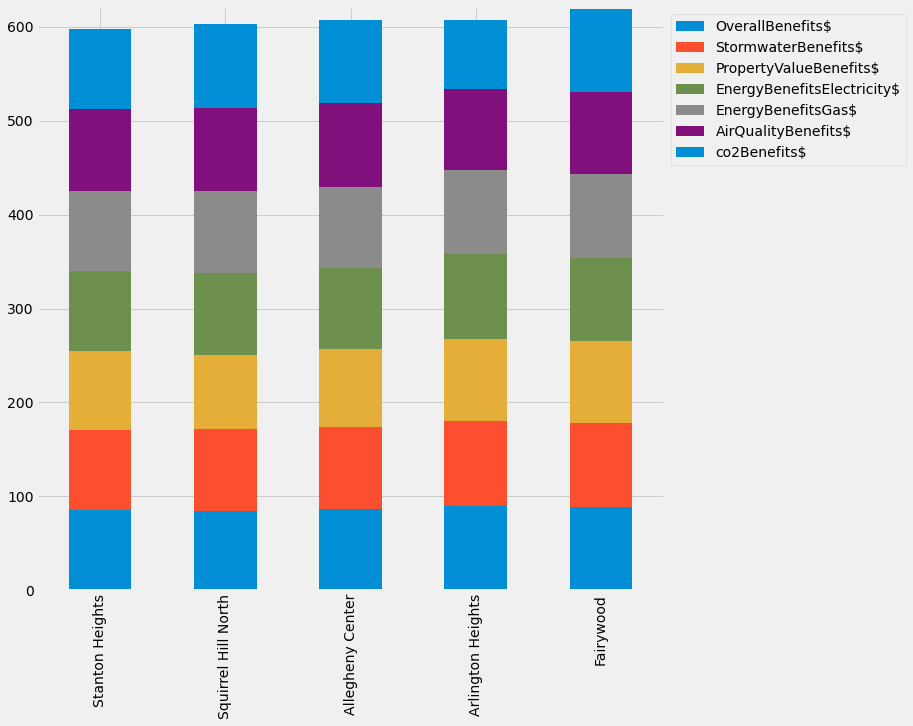

In [29]:
topScore = top5.iloc[4].iloc[0]
#print(topScore)
plt.style.use('fivethirtyeight')
top5.iloc[:,1:].plot(kind='bar',stacked='true', ylim=[0,topScore], figsize=(10,10))
#use the iloc[:,1:] to avoid the final ranking column since that doesn't add much to the graph
plt.legend(bbox_to_anchor=(1,1))

What this graph shows is that despite Arlington Heights leading for most of the categories (in fact in placed 1st in 4 of the 7 categories) it performed dismally on the final criteria, co2 benefit in dollar value, and thus not only did it fail to win the Tree criteria but it actually tied for second.

In [20]:
#top5.plot(kind='bar', stacked='true')
top5.iloc[:,1:]

,OverallBenefits$,StormwaterBenefits$,PropertyValueBenefits$,EnergyBenefitsElectricity$,EnergyBenefitsGas$,AirQualityBenefits$,co2Benefits$
Stanton Heights,85,86,84,85,85,87,86
Squirrel Hill North,84,88,79,87,87,89,89
Allegheny Center,87,87,83,86,86,90,88
Arlington Heights,90,90,88,90,90,86,73
Fairywood,89,89,87,89,89,88,90


## The stuff below this cell is sort of random and just test stuff, probably not really worth looking at ## 

In [21]:
avgHeight = trees.groupby('neighborhood')['height'].mean()
print(avgHeight)

neighborhood
Allegheny Center        0.794220
Allegheny West         15.178378
Allentown              22.378788
Arlington              20.531915
Arlington Heights      42.600000
                         ...    
Upper Lawrenceville    25.894578
West End               22.084034
West Oakland           16.957746
Westwood               29.581673
Windgap                29.417476
Name: height, Length: 90, dtype: float64


In [22]:
print(avgHeight.sort_values())
sortedAvgHeight = avgHeight.sort_values()

neighborhood
Allegheny Center        0.794220
Perry North             9.918803
Troy Hill              11.350962
Highland Park          12.028169
Squirrel Hill South    13.806197
                         ...    
East Hills             37.212121
St. Clair              38.500000
Arlington Heights      42.600000
Fairywood              42.964286
Hays                   45.000000
Name: height, Length: 90, dtype: float64


In [23]:
print(len(sortedAvgHeight))

90


In [24]:
avgOverallBenefitsDollarValue = treesByNeighborhood['overall_benefits_dollar_value'].mean()
print(avgOverallBenefitsDollarValue)

neighborhood
Allegheny Center       171.791881
Allegheny West         149.084659
Allentown              120.451284
Arlington               71.204809
Arlington Heights      218.471558
                          ...    
Upper Lawrenceville    111.307346
West End                82.564056
West Oakland            76.122696
Westwood               126.776044
Windgap                135.477024
Name: overall_benefits_dollar_value, Length: 90, dtype: float64


In [25]:
sortedAvgOverallBenefitsDollarValue = avgOverallBenefitsDollarValue.sort_values()
print(sortedAvgOverallBenefitsDollarValue)

neighborhood
Troy Hill                 43.015155
South Shore               45.616670
Polish Hill               65.607477
Central Lawrenceville     66.689438
Strip District            69.347687
                            ...    
St. Clair                170.079518
Allegheny Center         171.791881
Hays                     181.397515
Fairywood                207.420886
Arlington Heights        218.471558
Name: overall_benefits_dollar_value, Length: 90, dtype: float64


In [26]:
#This is what is currently breaking

#pointsAwarded = pd.Series()

#maybe sort by Index (labels)

#for i in range(len(sortedAvgOverallBenefitsDollarValue)):
    #print(sortedAvgOverallBenefitsDollarValue[i])
    #print(sortedAvgOverallBenefitsDollarValue.keys)
    #print(points.get(sortedAvgOverallBenefitsDollarValue[i]))
    #points.get(sortedAvgOverallBenefitsDollarValue[i]) = points.get(sortedAvgOverallBenefitsDollarValue[i]) + (i+1)
    #print((sortedAvgOverallBenefitsDollarValue[i], i))

print(points)

NaN                        0
Troy Hill                  9
South Shore               17
Strip District            34
Central Lawrenceville     40
                        ... 
Stanton Heights          598
Squirrel Hill North      603
Allegheny Center         607
Arlington Heights        607
Fairywood                621
Length: 91, dtype: int64


In [27]:
print(sortedAvgOverallBenefitsDollarValue.keys)
print(type(sortedAvgOverallBenefitsDollarValue.keys))

<bound method Series.keys of neighborhood
Troy Hill                 43.015155
South Shore               45.616670
Polish Hill               65.607477
Central Lawrenceville     66.689438
Strip District            69.347687
                            ...    
St. Clair                170.079518
Allegheny Center         171.791881
Hays                     181.397515
Fairywood                207.420886
Arlington Heights        218.471558
Name: overall_benefits_dollar_value, Length: 90, dtype: float64>
<class 'method'>
